$$ \frac{\partial u}{\partial t} = -u \frac{\partial u}{\partial x} $$

In [2]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [8]:
def u_initial(nx):
    """Inintiates u"""
    u = numpy.zeros(nx)
    u[:nx/2] = 1

    return u

In [4]:
def computeF(u):
    """Computes flux"""
    
    return u

In [25]:
def maccormack(u, nt, dt, dx, eps):
    un = numpy.zeros((nt,len(u)))
    un[:] = u.copy()
    ustar = u.copy()    

    for n in range(1,nt):
        F = computeF(u)
        ustar[1:-1] = u[1:-1] - dt/dx*(F[2:] - F[1:-1]) + \
                     eps*(u[2:] - 2*u[1:-1] + u[:-2])
        #ustar[-1] = u[-1]
        Fstar = computeF(ustar)
        un[n, 1:] = 0.5*(u[1:] + ustar[1:] - dt/dx*(Fstar[1:] - Fstar[:-1]))
        #un[n, 0] = u[0]
        u = un[n].copy()

    return un

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future



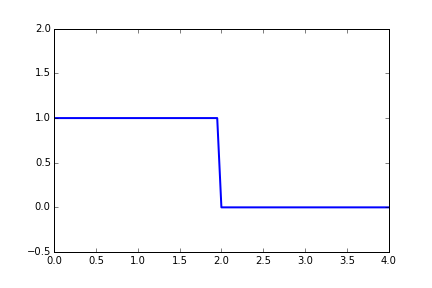
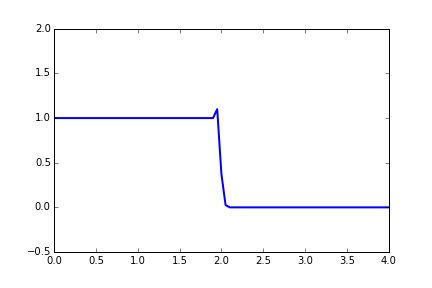
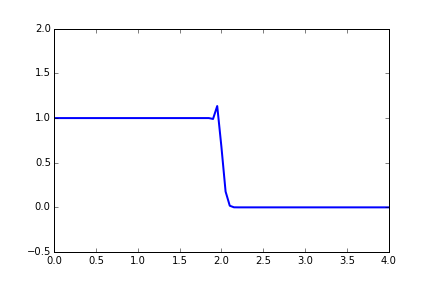
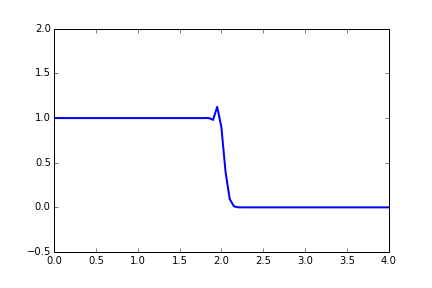
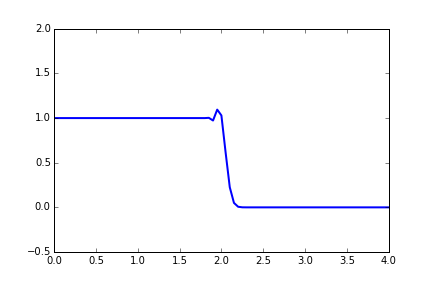
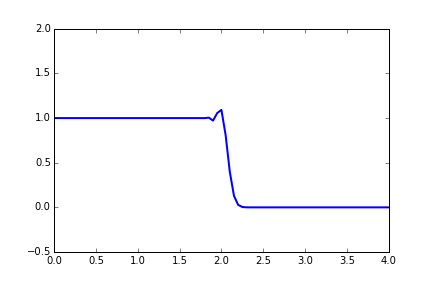
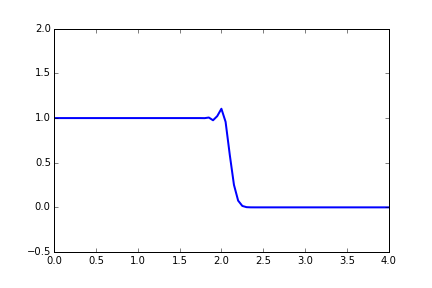
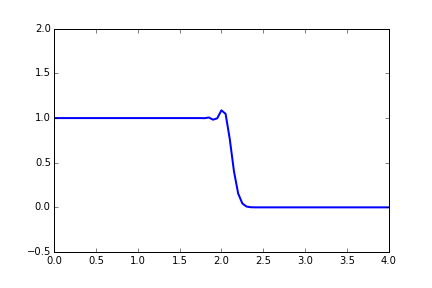
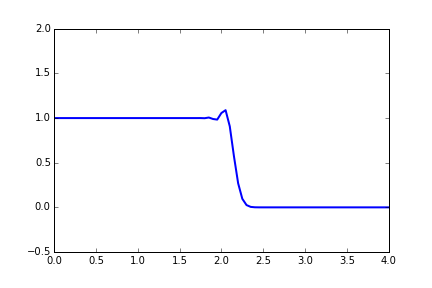
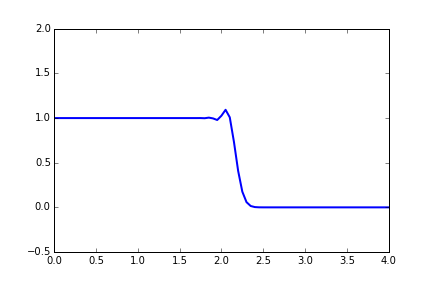
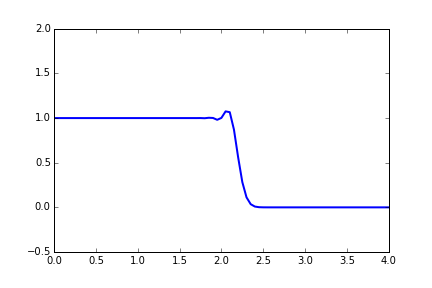
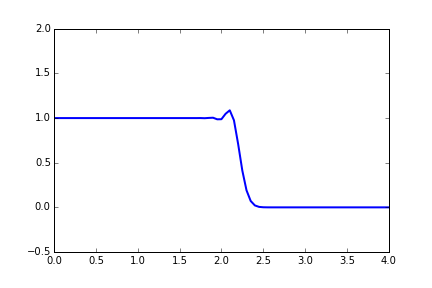
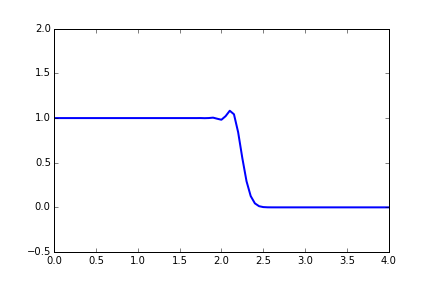
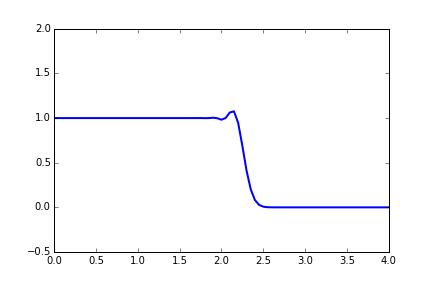
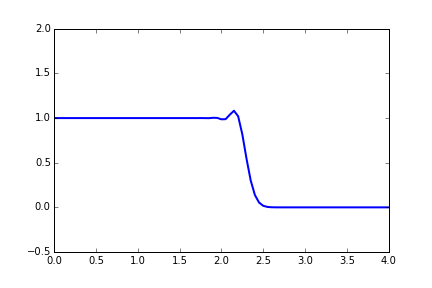
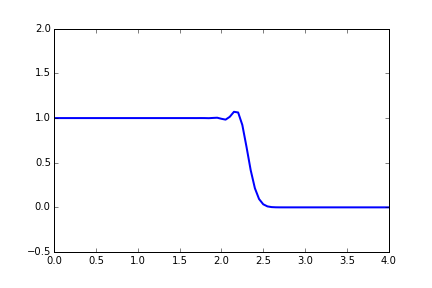
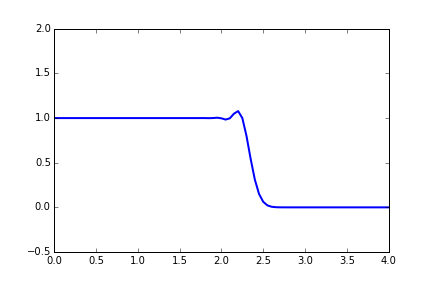
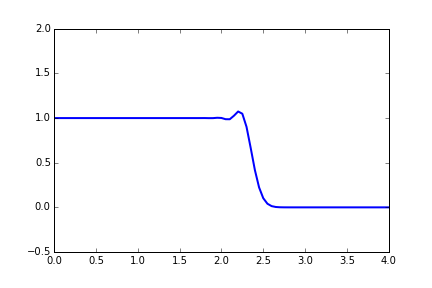
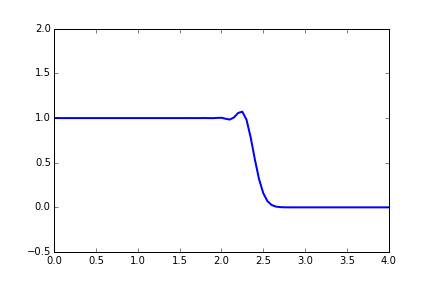
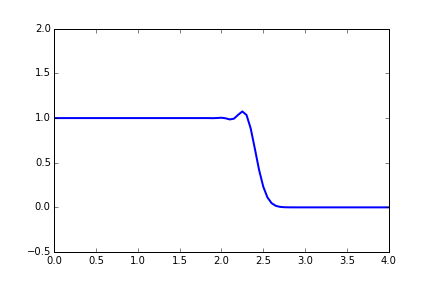
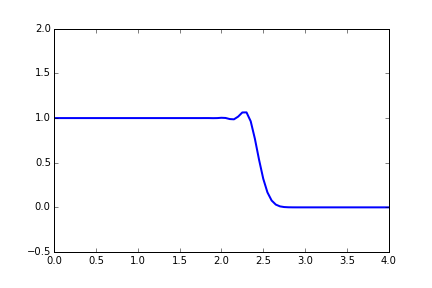
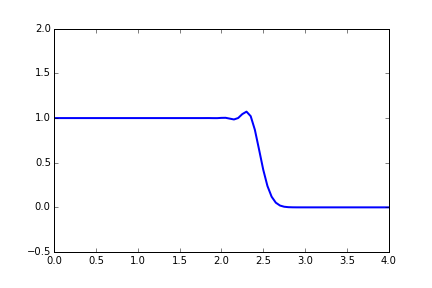
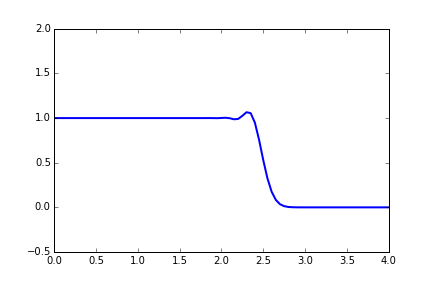
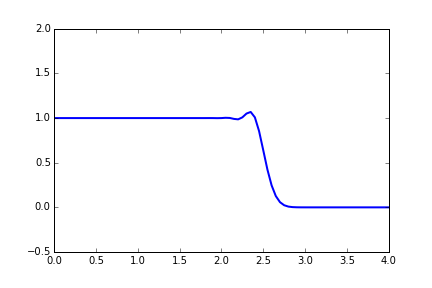
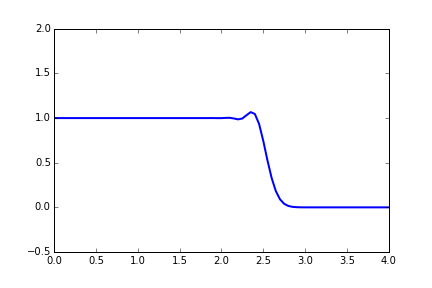
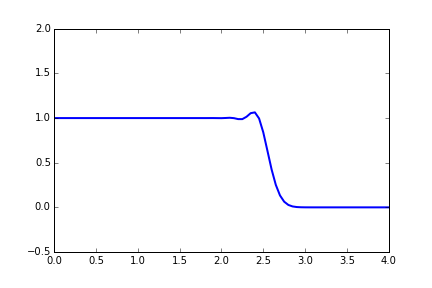
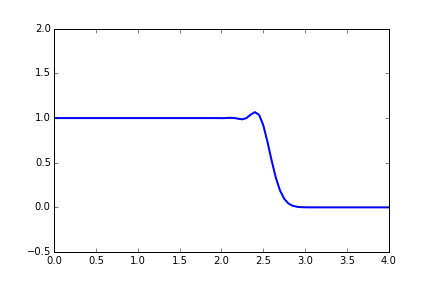
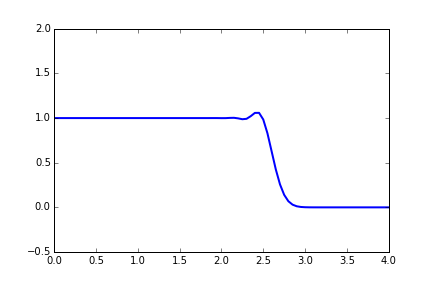
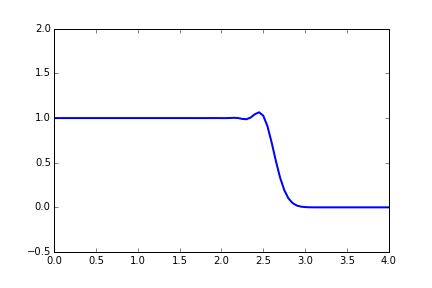
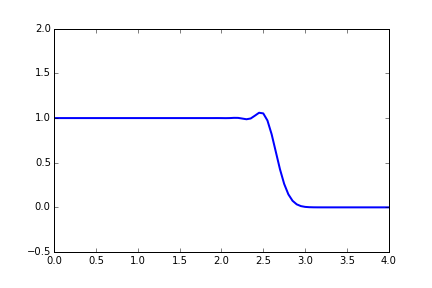
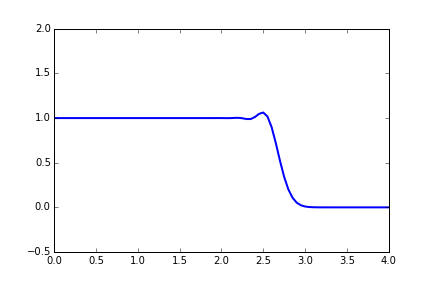
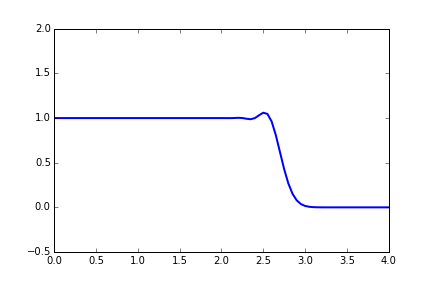
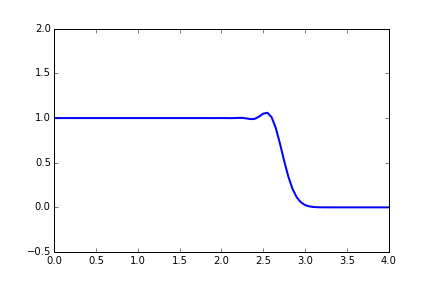
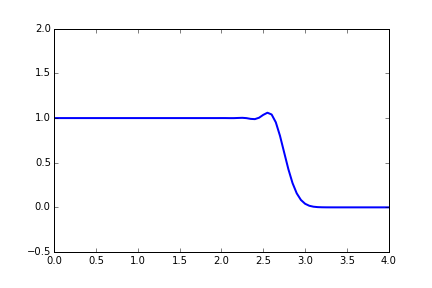
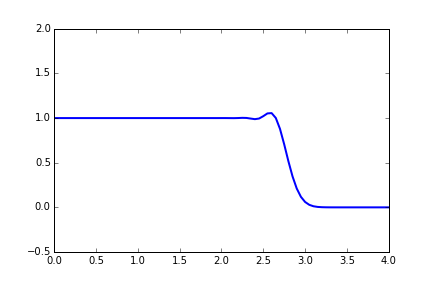
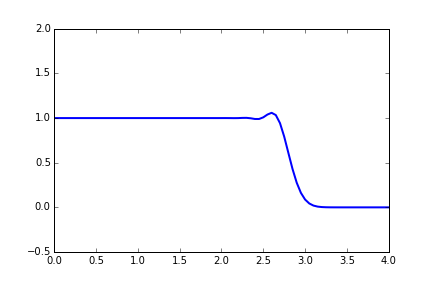
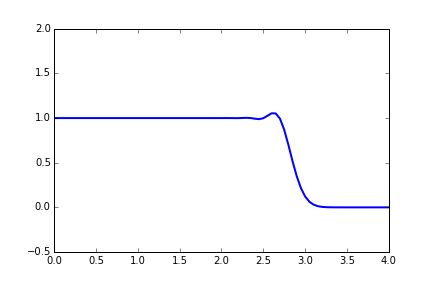
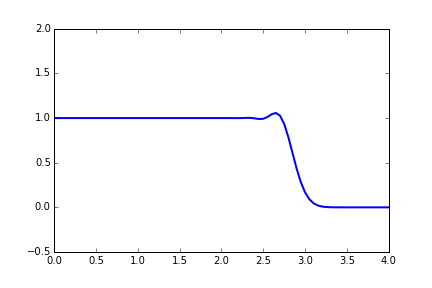
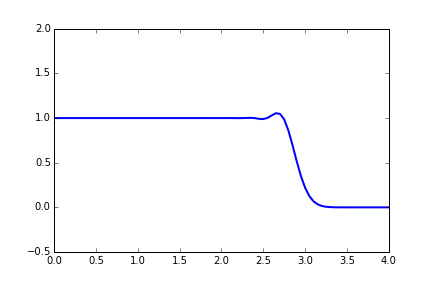
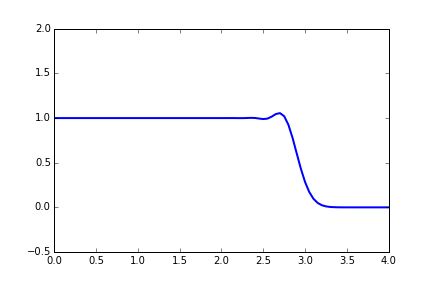
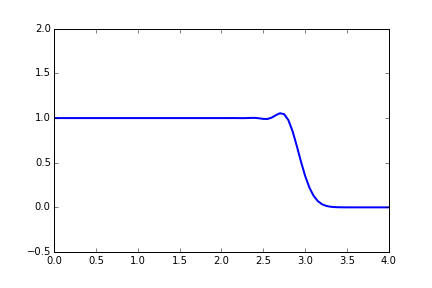
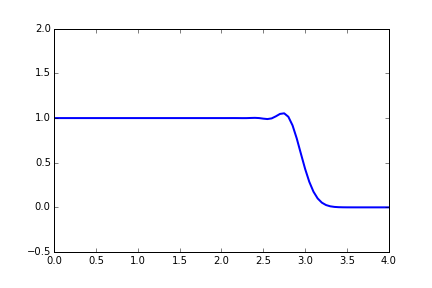
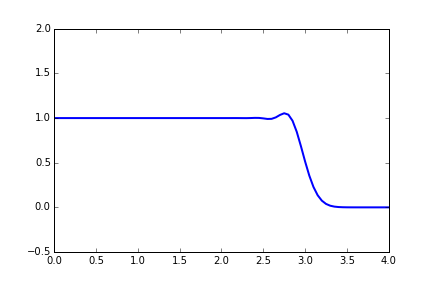
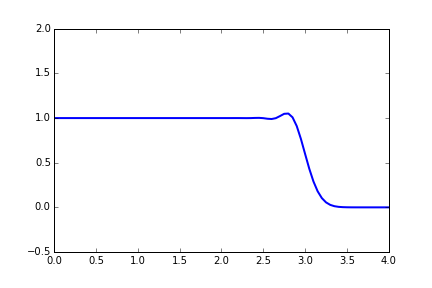
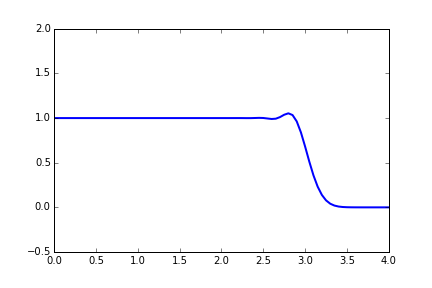
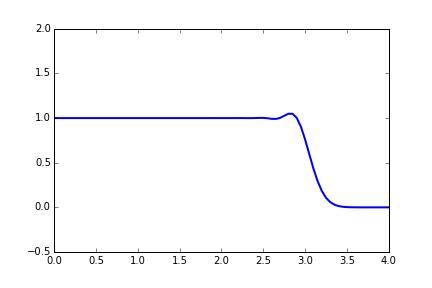
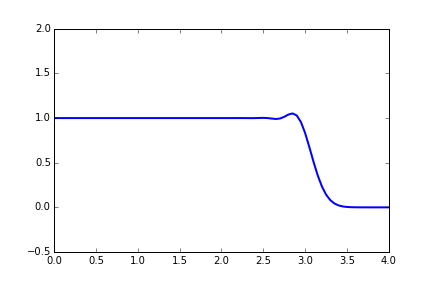
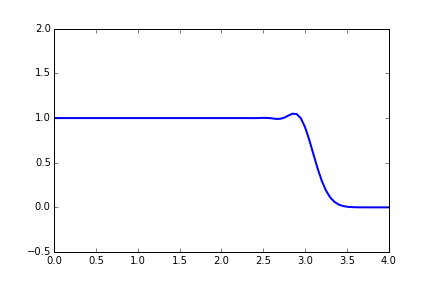
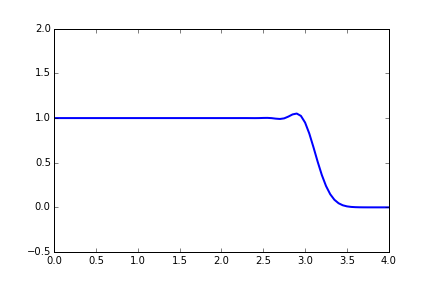
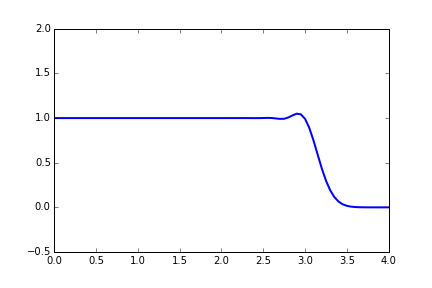
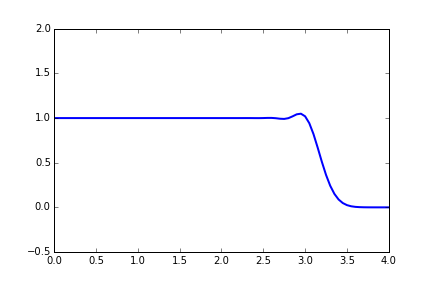
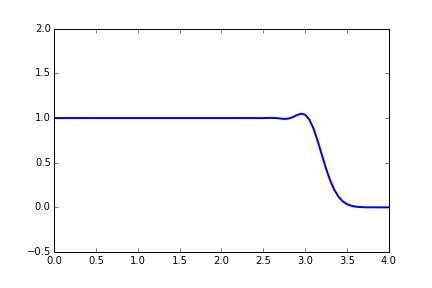
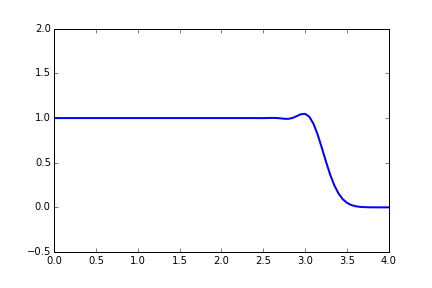
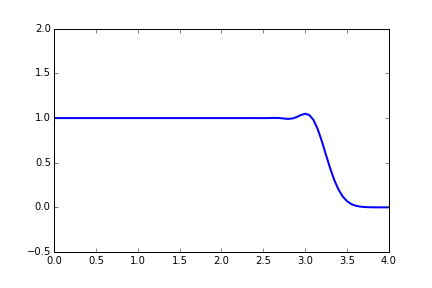
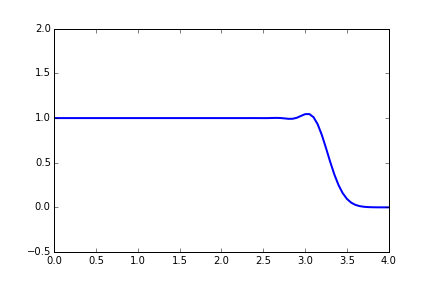
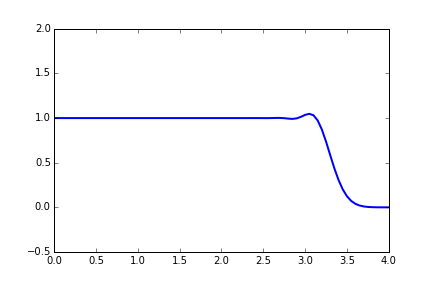
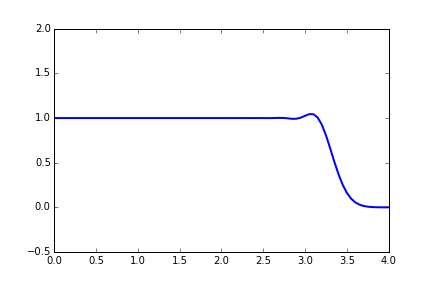
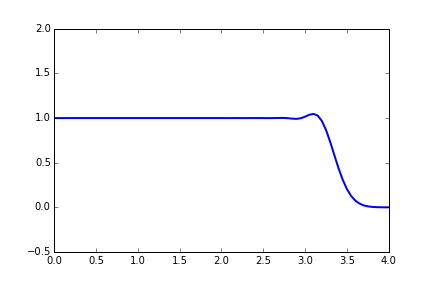
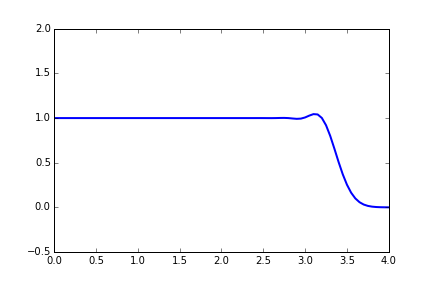
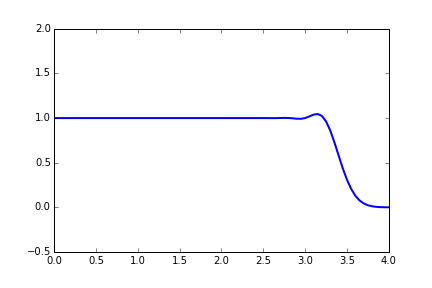
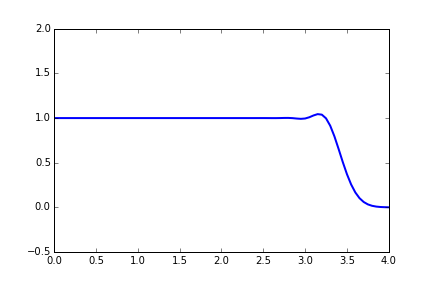
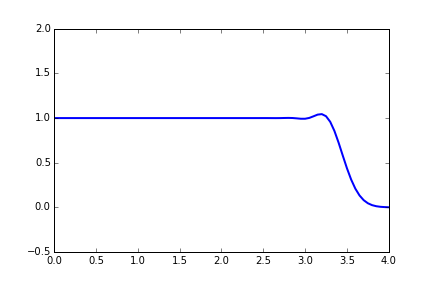
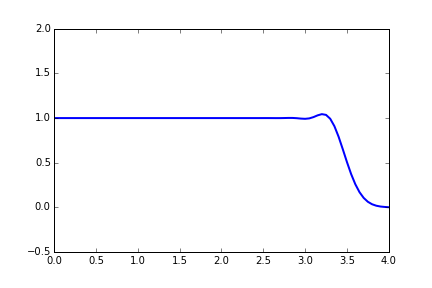
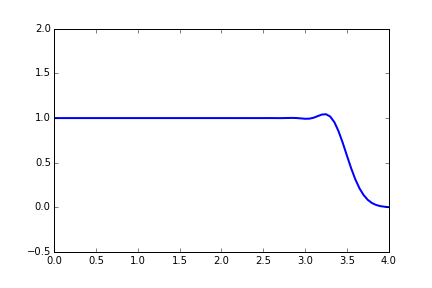
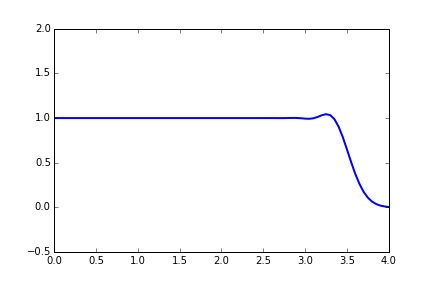
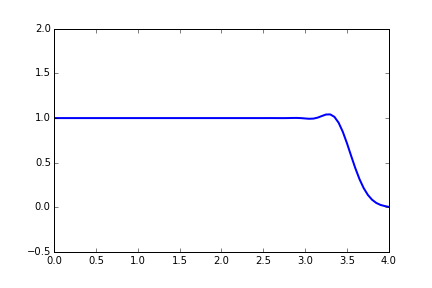
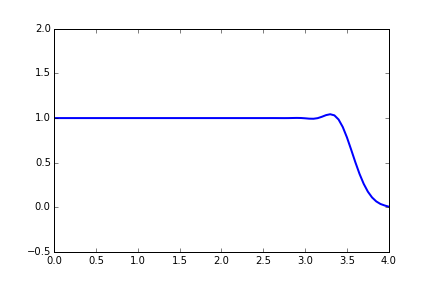
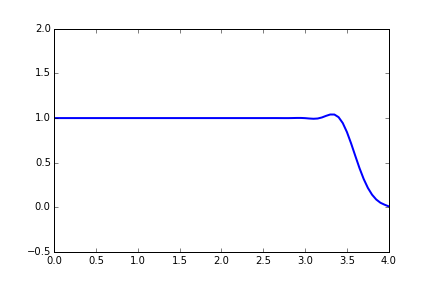
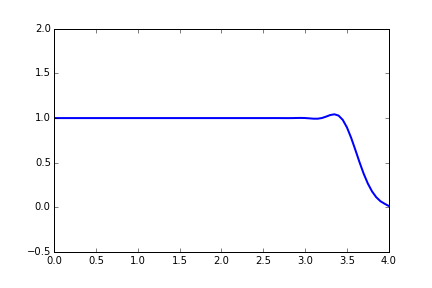
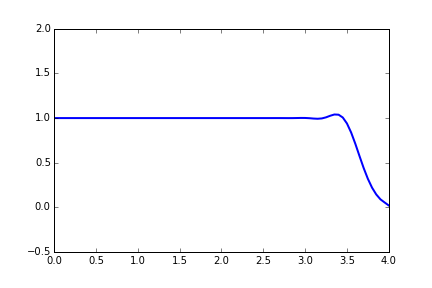

In [30]:
nx = 81
nt = 70
dx = 4.0/(nx-1)

def animate(data):
    x = numpy.linspace(0,4,nx)
    y = data
    line.set_data(x,y)
    return line,

u = u_initial(nx)
sigma = 0.5
dt = sigma*dx
eps = 0.1

un = maccormack(u,nt,dt,dx,eps)

fig = plt.figure();
ax = plt.axes(xlim=(0,4),ylim=(-.5,2));
line, = ax.plot([],[],lw=2);

anim = animation.FuncAnimation(fig, animate, frames=un, interval=50)
display_animation(anim, default_mode='once')